##Importing libraries and the datset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Mini Project/preprocessed_data2.csv")

In [ ]:
pd.set_option("display.max_columns",None)
df.drop(df.columns[[0]],inplace=True,axis=1)
df.head()

,short_name,value_eur,wage_eur,preferred_foot,team_position,weak_foot,skill_moves,age,work_rate,team_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_positions,overall,potential
0,L. Messi,67500000,560000,Left,CAM,4,4,33,Medium/Low,10.0,85.0,92.0,91.0,95.0,38.0,65.0,10.0,10.0,10.0,10.0,10.0,10.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,"RW, ST, CF",93,93
1,Cristiano Ronaldo,46000000,220000,Right,LS,4,5,35,High/Low,7.0,89.0,93.0,81.0,89.0,35.0,77.0,10.0,10.0,10.0,10.0,10.0,10.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95.0,71.0,94.0,95.0,84.0,78.0,93.0,63.0,29.0,95.0,82.0,84.0,95.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,"ST, LW",92,92
2,J. Oblak,75000000,125000,Right,GK,3,1,27,Medium/Medium,13.0,30.0,30.0,30.0,30.0,30.0,30.0,87.0,92.0,78.0,90.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88.0,49.0,59.0,78.0,41.0,78.0,12.0,34.0,19.0,11.0,65.0,11.0,68.0,12.0,18.0,87.0,92.0,78.0,90.0,90.0,GK,91,93
3,R. Lewandowski,80000000,240000,Right,ST,4,4,31,High/Medium,9.0,78.0,91.0,78.0,85.0,43.0,82.0,10.0,10.0,10.0,10.0,10.0,10.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93.0,82.0,89.0,84.0,76.0,86.0,85.0,81.0,49.0,94.0,79.0,88.0,88.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,ST,91,91
4,Neymar Jr,90000000,270000,Right,LW,5,5,28,High/Medium,10.0,91.0,85.0,86.0,94.0,36.0,59.0,10.0,10.0,10.0,10.0,10.0,10.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91.0,83.0,80.0,62.0,81.0,50.0,84.0,51.0,36.0,87.0,90.0,92.0,93.0,30.0,29.0,9.0,9.0,15.0,15.0,11.0,"LW, CAM",91,91


In [ ]:
df.columns.get_loc('shooting')

11

In [ ]:
df.work_rate.unique()

array(['Medium/Low', 'High/Low', 'Medium/Medium', 'High/Medium',
       'High/High', 'Medium/High', 'Low/High', 'Low/Medium', 'Low/Low'],
      dtype=object)

In [ ]:
df.team_position.unique()

array(['CAM', 'LS', 'GK', 'ST', 'LW', 'RCM', 'LCB', 'RW', 'SUB', 'CF',
       'CDM', 'RDM', 'RS', 'LCM', 'RB', 'LB', 'LM', 'RCB', 'LF', 'CB',
       'RM', 'LDM', 'RF', 'RES', 'LWB', 'CM', 'LAM', 'RWB', 'RAM'],
      dtype=object)

##Age vs Pace

In [ ]:
X1 = df.iloc[:,[7,10]].values
print(X1)

[[33. 85.]
 [35. 89.]
 [27. 30.]
 ...
 [22. 73.]
 [23. 67.]
 [22. 78.]]


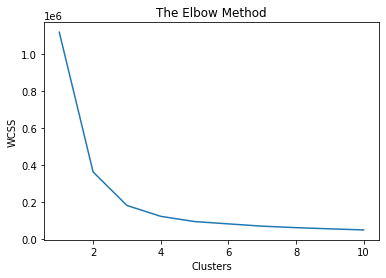

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3,init="k-means++",random_state=0)
y_kmeans = kmeans.fit_predict(X1)

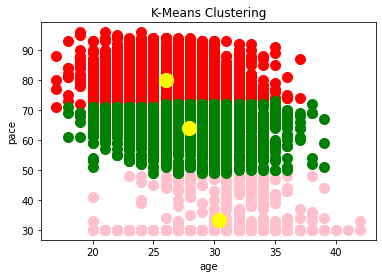

In [ ]:
plt.scatter(X1[y_kmeans==0,0],X1[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X1[y_kmeans==1,0],X1[y_kmeans==1,1],s=100,c='pink',label='Cluster 2')
plt.scatter(X1[y_kmeans==2,0],X1[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='yellow',label='Centroid')
plt.title("K-Means Clustering")
plt.xlabel("age")
plt.ylabel("pace")
plt.show()

##Shooting vs Pace






In [ ]:
X2 = df.iloc[:,[11,12]].values
print(X2)

[[92. 91.]
 [93. 81.]
 [30. 30.]
 ...
 [60. 68.]
 [66. 71.]
 [67. 53.]]


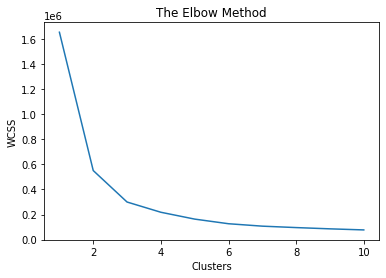

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3,init="k-means++",random_state=0)
y_kmeans = kmeans.fit_predict(X2)

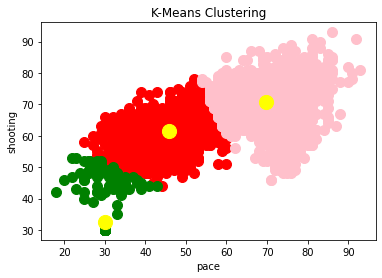

In [ ]:
plt.scatter(X2[y_kmeans==0,0],X2[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X2[y_kmeans==1,0],X2[y_kmeans==1,1],s=100,c='pink',label='Cluster 2')
plt.scatter(X2[y_kmeans==2,0],X2[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='yellow',label='Centroid')
plt.title("K-Means Clustering")
plt.xlabel("pace")
plt.ylabel("shooting")
plt.show()